In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.animation import FuncAnimation
import math
%matplotlib widget

## Lorenz equation

In [12]:

def lorenz_equation(xyz, sigma=10, p=38, beta=8/3):
    """calculation of the derivative of the lorenz equantion for one time step

    Args:
        xyz (np.array): input points of shape (n, 3) where n is the number of points
        sigma (int, optional): Defaults to 10.
        p (int, optional):  Defaults to 38.
        beta (float, optional): Defaults to 8/3.

    Returns:
        np.array: dx dy and dz for given points. Shape (n, 3)
    """
    x = xyz[:,0]
    y = xyz[:,1]
    z = xyz[:,2]
    
    dx = sigma * (y - x)
    dy = x* (p - z) - y
    dz = x * y - beta * z

    return np.array([dx, dy, dz]).T

def create_lorenz_traj(start_points: np.array, n_steps: int,  dt=0.01):
    """Calculate the points trajectory of the lorenz equation complimented with its derivatives by using Eulers method.

    Args:
        start_points (np.array): matrix of start_points with shape nx3 
        n_steps (int): number of discrete timesteps
        dt (float, optional): time interval. Defaults to 0.01.

    Returns:
        tuple: returns a tuple of the trajectory points matrix of shape t+1xnx3 and the derivative matrix of txnx3
    """
    xyz = np.empty((n_steps + 1, start_points.shape[0], start_points.shape[1]))
    xyz[0] = start_points

    dxyz = np.empty((n_steps, start_points.shape[0], start_points.shape[1]))

    for i in range(n_steps):
        dt_xyz = lorenz_equation(xyz[i])
        dxyz[i] = dt_xyz
        xyz[i+1] = xyz[i] + dt_xyz * dt

    return xyz, dxyz

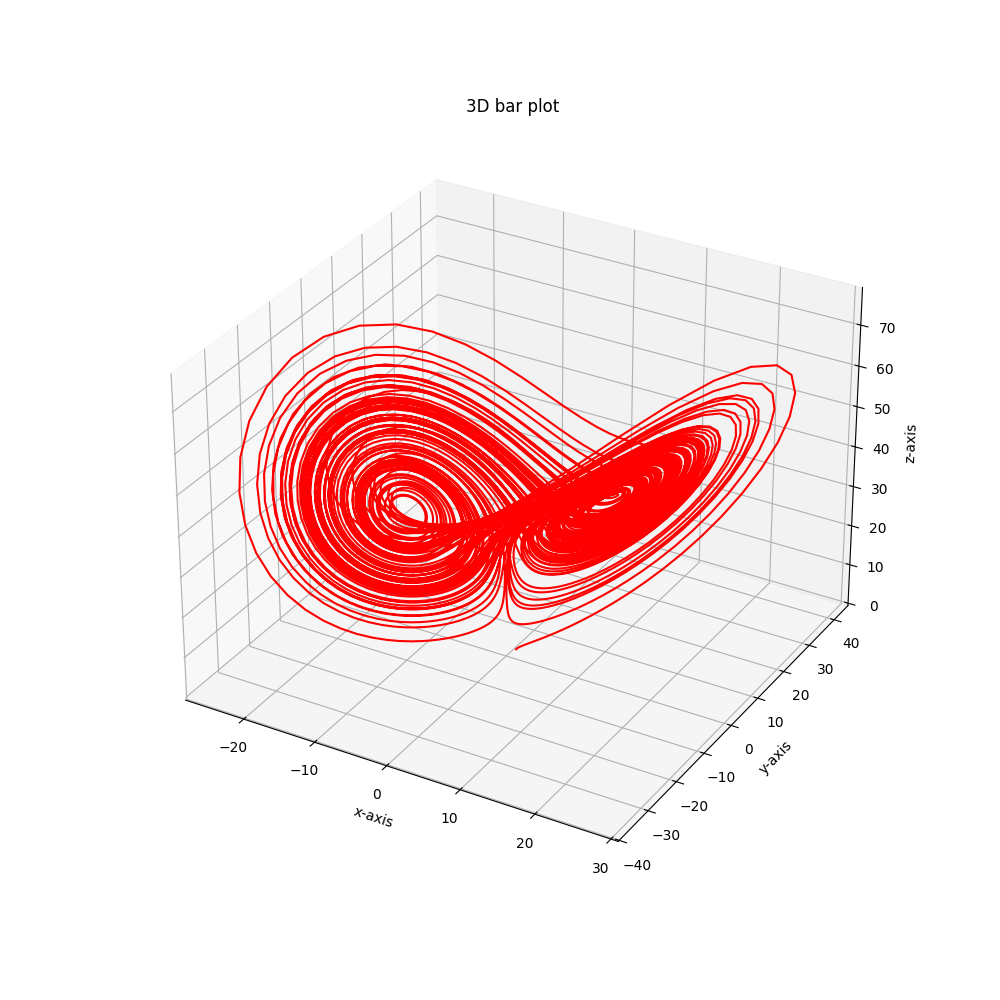

In [9]:
n_steps = 10000
start_point = np.array([[1,1,1]])

xyz, _ = create_lorenz_traj(start_point, n_steps)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
line = ax.plot(xyz[:,0,0], xyz[:,0,1], xyz[:,0,2], color="r")[0]

ax.set_title("3D bar plot") 
ax.set_xlabel('x-axis') 
ax.set_ylabel('y-axis') 
ax.set_zlabel('z-axis')

def animate(i):
    line.set_data_3d(xyz[:i, 0, :].T)  # update the data.
    line.set(alpha=.5, color="r")
    return line


ani = FuncAnimation(
    fig, animate, n_steps, interval=10, repeat=True)

plt.show()

In [10]:
plt.close()

## Create dataset

In [4]:
n_steps = 10000

start_points = np.random.uniform(low=-20, high=20, size=(10,3))

xyz, dxyz = create_lorenz_traj(start_point, n_steps)

In [29]:
# feature expansion

def calc_expansion_dim(degree: int, space_dim: int=3):
    """Calculates the dimension after expansion

    Args:
        degree (int): max degree of the expansion
        space_dim (int, optional): The spatial dimension of the Differential equation (Lorenz equation has 3 dimensions). Defaults to 3.

    Returns:
        int: Size of the expanded dimension
    """
    dim = 1

    if degree >= 1:
        dim += space_dim

    if degree >= 2:
        for d in range(degree+1)[2:]:
            dim += math.comb(space_dim + d -1, d)

    return dim

def poly_expansion(X: np.array, max_deg=3):
    """A plynomial expansion of the input data up to max_exp

    Args:
        X (np.array): Trajectory data over time of shape txnx3 where t is the number of timesteps and n the number of start points
        max_deg (int, optional): Degree of the maximum expansion. Defaults to 3.

    Returns:
        np.array: The polynomial expanded input matrix of shape ...
    """
    t,n,_ = X.shape

    X_poly = np.empty((t, n, calc_expansion_dim(max_deg)))

    X_poly[:,n, 1:4] = X

    return X_poly

def sin_expansion(X: np.array, wave: str):
    if wave == "sin":
        pass
    elif wave == "cos":
        pass
    return None

def theta(X: np.array):
    pass


## SINDy Model

In [5]:
import torch